<a href="https://colab.research.google.com/github/altform/Instagram_marketing_demo/blob/main/Instagram_influencers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reviewing a dataset supplied by Kaggle (https://www.kaggle.com/datasets/ankulsharma150/marketing-analytics-project), which contains the top 1000 Instagram influencer accounts. The initial column descriptions provide insights into the number of followers each influencer has, their category of influence, and the level of engagement from their followers.

I'll begin by importing the necessary libraries for early exploration and analysis of the dataset's metrics.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

Importing the dataset for review and examining its initial structure.



In [4]:
df_influencers = pd.read_csv('Instagram-Data.csv')

df_influencers.head()

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000,India,7800000,9500000,50:24.8
1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000,United States,6200000,10100000,50:24.8
2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000,Argentina,4800000,6500000,50:24.8
3,All,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000,United States,3400000,5400000,50:24.8
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000,United States,2700000,3600000,50:24.8


In [5]:
df_influencers.count()

,0
Country,1000
Rank,1000
Account,1000
Title,983
Link,1000
Category,909
Followers,1000
Audience Country,993
Authentic engagement,1000
Engagement avg,1000


Non-title entries without values can be filled with 'Not applicable,' and I will do the same for the category column, using 'Generic' where applicable. I'll remove countries without entries for now, but may reintroduce them as 'Global' if needed.

In [6]:
#Populate the missing data with relevant terms
df_influencers['Title'] = df_influencers['Title'].fillna('Generic')
df_influencers['Category'] = df_influencers['Category'].fillna('Generic')

#will review the significance of influencer's audience country with non applicable countries later to determine if its statistically significant and if not remove
df_influencers['Audience Country'] = df_influencers['Audience Country'].fillna('Not applicable')

In [7]:
df_influencers['Category'].nunique()

166

I want to assess whether it makes sense to target advertising within those categories or towards specific influencers.

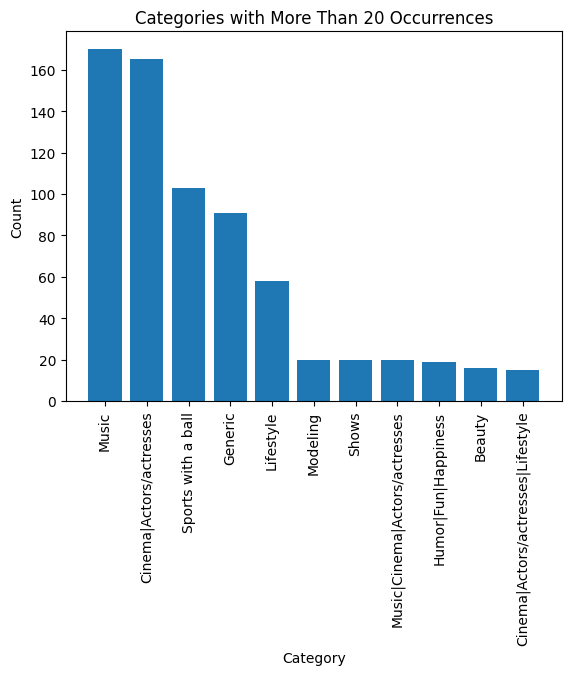

In [8]:
#Group by 'Category' and get the count of each unique category
category_counts = df_influencers['Category'].value_counts()

#Filter the categories that have more than 10 occurrences
category_counts_filtered = category_counts[category_counts > 10]

#Create the bar graph
plt.bar(category_counts_filtered.index, category_counts_filtered.values)

#Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Categories with More Than 20 Occurrences')

#Rotate x labels for better readability
plt.xticks(rotation=90)

#Display the graph
plt.show()

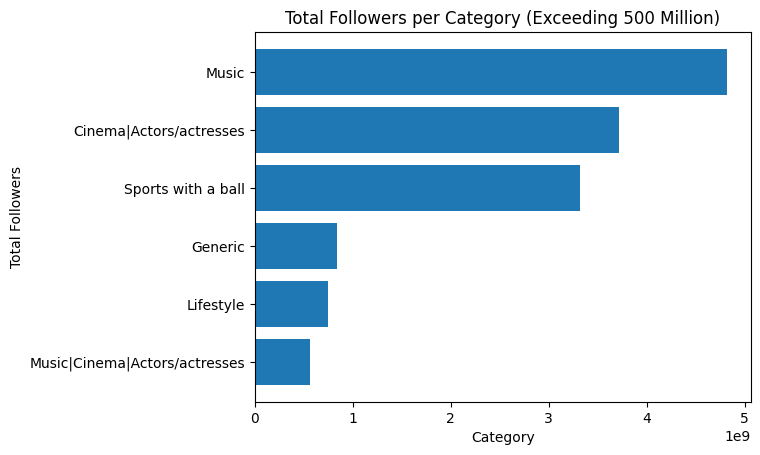

In [9]:
followers_per_category = df_influencers.groupby('Category')['Followers'].sum()
followers_per_category_filtered = followers_per_category[followers_per_category > 5e8]
followers_per_category_filtered = followers_per_category_filtered.sort_values(ascending=True)

plt.barh(followers_per_category_filtered.index, followers_per_category_filtered.values)

plt.xlabel('Category')
plt.ylabel('Total Followers')
plt.title('Total Followers per Category (Exceeding 500 Million)')

plt.xticks(rotation=0)

plt.show()

It's clear that a few categories are especially popular, but how do they compare against the total number?

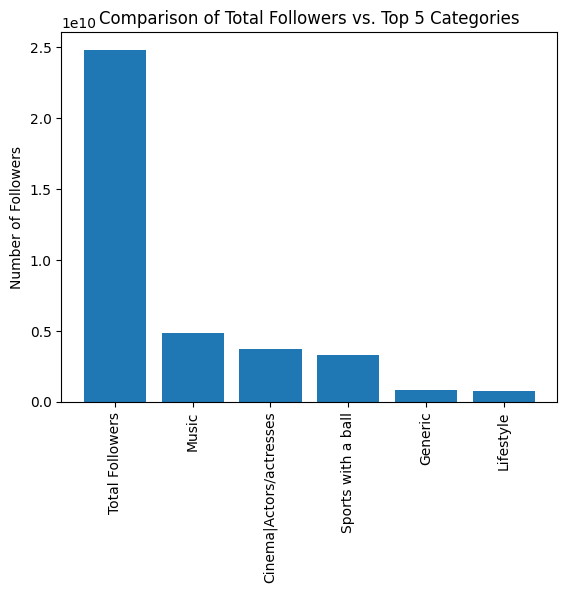

In [10]:
followers_per_category = df_influencers.groupby('Category')['Followers'].sum()
total_followers = followers_per_category.sum()

top_5_categories = followers_per_category.nlargest(5)

comparison_data = pd.Series({'Total Followers': total_followers})
comparison_data = pd.concat([comparison_data, top_5_categories])

plt.bar(comparison_data.index, comparison_data.values)

plt.ylabel('Number of Followers')
plt.title('Comparison of Total Followers vs. Top 5 Categories')

plt.xticks(rotation=90)

plt.show()

The analysis shows that music and ball sports are likely areas to target for marketing strategies. Since Cinema/Actor/Actress categories focus on individuals rather than broad sectors, I'll exclude them from future analysis, assuming the goal is to identify broader marketing opportunities.

In [11]:
df_influencers.head()

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000,India,7800000,9500000,50:24.8
1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000,United States,6200000,10100000,50:24.8
2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000,Argentina,4800000,6500000,50:24.8
3,All,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000,United States,3400000,5400000,50:24.8
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000,United States,2700000,3600000,50:24.8


In [12]:
df_followers_sorted = df_influencers.sort_values(by='Followers', ascending=False)

df_followers_sorted.head()

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
28,All,29,instagram,Instagram,https://www.instagram.com/instagram/,Photography,469600000,India,490400,608100,50:24.8
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000,India,7800000,9500000,50:24.8
1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000,United States,6200000,10100000,50:24.8
2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000,Argentina,4800000,6500000,50:24.8
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000,United States,2700000,3600000,50:24.8


The 'Audience Country' column, where values are 'Not applicable,' seems statistically significant. I'll rename this value to 'Not provided' in case it's used in further iterations before running the country analysis.

In [13]:
df_influencers['Audience Country'] = df_influencers['Audience Country'].replace('Not applicable', 'Not Provided')

Analyzing the number of followers per country reveals, as expected, that the US has an exceedingly high count compared to other nations

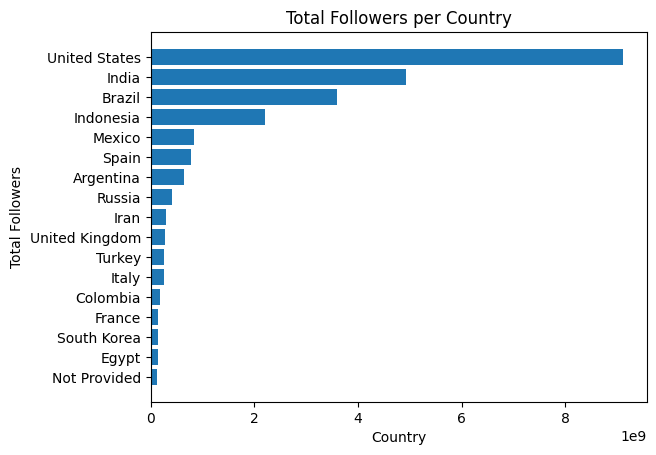

Audience Country
United States           9116200000
India                   4936000000
Brazil                  3588600000
Indonesia               2201500000
Mexico                   829500000
Spain                    786800000
Argentina                636500000
Russia                   407400000
Iran                     294700000
United Kingdom           283100000
Turkey                   259400000
Italy                    258700000
Colombia                 177800000
France                   142800000
South Korea              142400000
Egypt                    138800000
Not Provided             118000000
Germany                   92200000
Philippines               87900000
Iraq                      65200000
Nigeria                   60000000
Thailand                  44500000
China                     27000000
Saudi Arabia              24800000
Poland                    24200000
Morocco                   20500000
Japan                     14400000
Kazakhstan                14000000
Uni

In [14]:
followers_per_country = df_influencers.groupby('Audience Country')['Followers'].sum()
followers_per_country_filtered = followers_per_country[followers_per_country > 1e8]
followers_per_country_filtered = followers_per_country_filtered.sort_values(ascending=True)

plt.barh(followers_per_country_filtered.index, followers_per_country_filtered.values)

plt.xlabel('Country')
plt.ylabel('Total Followers')
plt.title('Total Followers per Country')

plt.xticks(rotation=0)
followers_per_country
plt.show()

print(followers_per_country.sort_values(ascending=False))

Examining the most popular categories within the US market.

In [15]:
#create US Data Frame
df_us = df_influencers[df_influencers['Audience Country'] == 'United States']

#Remove the cinemas actors and actreses
followers_per_category_us_filtered_act = df_us[~df_us['Category'].str.contains('Cinema|Actors/actresses', case=False, na=False, regex=True)]

followers_per_category_us = followers_per_category_us_filtered_act.groupby('Category')['Followers'].sum()
followers_per_category_us = followers_per_category_us.sort_values(ascending=False)

print(followers_per_category_us)


Category
Music                                1883500000
Music|Fashion                         375000000
Music|Lifestyle                       317700000
Fashion|Modeling|Beauty               308800000
Sports with a ball                    302900000
                                        ...    
Modeling|Music                          6800000
Lifestyle|Modeling|Fashion              6700000
Clothing|Outfits                        6700000
Lifestyle|Shows|Computers|Gadgets       6000000
Lifestyle|Fashion                       5000000
Name: Followers, Length: 75, dtype: int64


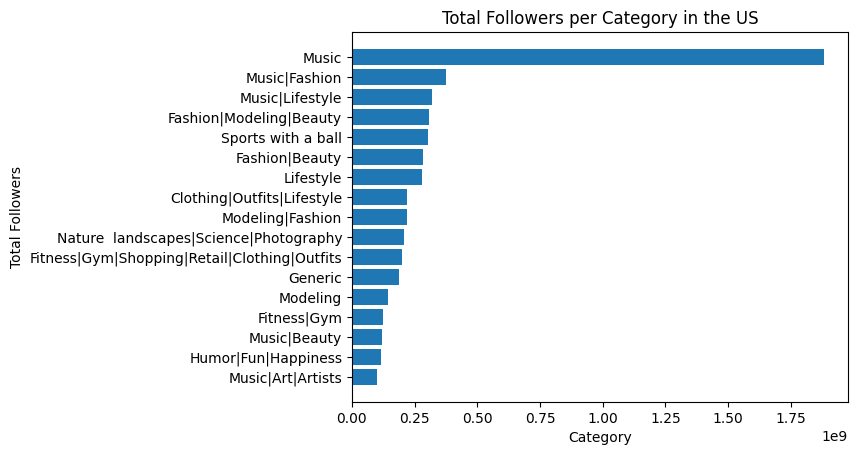

In [16]:
followers_per_category_us_filtered = followers_per_category_us [followers_per_category_us > 1e8]
followers_per_category_us_filtered = followers_per_category_us_filtered.sort_values(ascending=True)

plt.barh(followers_per_category_us_filtered.index, followers_per_category_us_filtered.values)

plt.xlabel('Category')
plt.ylabel('Total Followers')
plt.title('Total Followers per Category in the US')

plt.xticks(rotation=0)
followers_per_category_us_filtered
plt.show()

From here, my advice would depend largely on the company's size, as this impacts cost. Generally, the larger the company, the more capital they have available. Assuming I am working with a small to medium-sized company, I would advise against targeting the music category. Music is likely to demand the highest advertising budget, and its audience is broad and unfocused. Artists like Taylor Swift or Justin Bieber attract listeners from all demographics, making it harder to target a specific group. In contrast, categories like Clothing / Outfits / Lifestyle have more defined audiences with specific interests.

From there, we could conduct a deeper analysis within these categories to identify the top performers and assess their engagement metrics. However, without additional data that links engagement metrics directly to advertising revenue, the follower count may hold more value than engagement rates alone.

Let's take the Clothing / Outfits / Lifestyle categories in the U.S. as a sample to demonstrate what this analysis could look like.

In [17]:
df_us_inf_col = followers_per_category_us_filtered_act[followers_per_category_us_filtered_act['Category'] == 'Clothing|Outfits|Lifestyle']

df_us_inf_col.head()

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
17,All,18,khloekardashian,Khloé Kardashian,https://www.instagram.com/khloekardashian/,Clothing|Outfits|Lifestyle,219400000,United States,1500000,1900000,50:24.8


This category is propped up by a single user, lets check lifestyle

In [18]:
df_us_inf_life = followers_per_category_us_filtered_act[followers_per_category_us_filtered_act['Category'] == 'Lifestyle']

df_us_inf_life.head()

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
32,All,33,kourtneykardash,Kourtney ❤️,https://www.instagram.com/kourtneykardash/,Lifestyle,162200000,United States,1100000,1500000,50:24.8
374,All,375,hichasestokes,Generic,https://www.instagram.com/hichasestokes/,Lifestyle,7300000,United States,810700,1200000,50:24.8
446,All,447,vinniehacker,†,https://www.instagram.com/vinniehacker/,Lifestyle,5400000,United States,626200,1300000,50:24.8
485,All,486,madisonbaileybabe,Maddie Baby,https://www.instagram.com/madisonbaileybabe/,Lifestyle,6600000,United States,529300,991200,50:24.8
512,All,513,alexisren,Alexis Ren,https://www.instagram.com/alexisren/,Lifestyle,15500000,United States,251900,391200,50:24.8


In [19]:
df_us_inf_life.count()

,0
Country,13
Rank,13
Account,13
Title,13
Link,13
Category,13
Followers,13
Audience Country,13
Authentic engagement,13
Engagement avg,13


13 is more to work with atleast, so from here I want to see what the distribution of followers is or if its all in one account like Fashion.

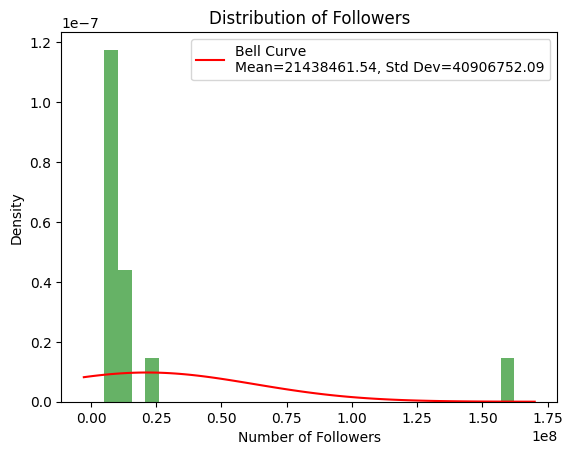

In [20]:
followers_dis = df_us_inf_life['Followers']

plt.hist(followers_dis, bins=30, density=True, alpha=0.6, color='g')

mean, std_dev = norm.fit(followers_dis)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std_dev)

plt.plot(x, y, 'r-', label=f'Bell Curve\nMean={mean:.2f}, Std Dev={std_dev:.2f}')
plt.xlabel('Number of Followers')
plt.ylabel('Density')
plt.title('Distribution of Followers')
plt.legend()

plt.show()

Thats not a great representation of ths distribution, will try a bar graph instead.

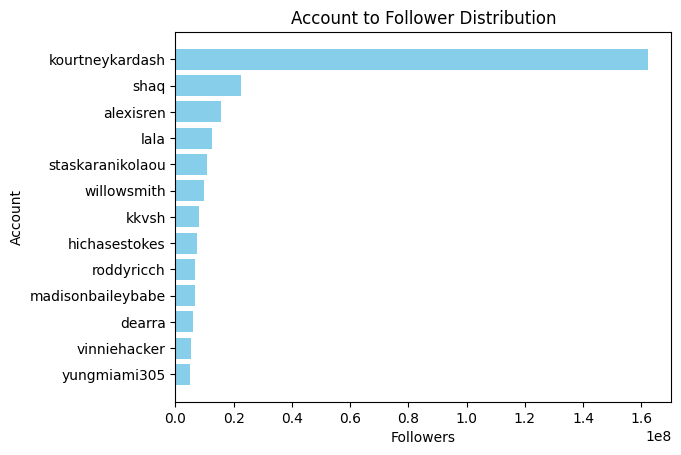

In [21]:
df_us_inf_life_sorted = df_us_inf_life.sort_values(by='Followers', ascending=True)

plt.barh(df_us_inf_life_sorted['Account'], df_us_inf_life_sorted['Followers'], color='skyblue')

plt.xlabel('Followers')
plt.ylabel('Account')
plt.title('Account to Follower Distribution')

plt.show()

Again another single account increasing the distribution, lets look at Sports with a ball

In [22]:
df_us_inf_ball = followers_per_category_us_filtered_act[followers_per_category_us_filtered_act['Category'] == 'Sports with a ball']

df_us_inf_ball.head()

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
38,All,39,kingjames,👑,https://www.instagram.com/kingjames/,Sports with a ball,111400000,United States,884300,1500000,50:24.8
356,All,357,houseofhighlights,House of Highlights,https://www.instagram.com/houseofhighlights/,Sports with a ball,31400000,United States,165200,303200,50:24.8
494,All,495,nba,NBA,https://www.instagram.com/nba/,Sports with a ball,63800000,United States,59100,98100,50:24.8
569,All,570,obj,Odell Beckham Jr,https://www.instagram.com/obj/,Sports with a ball,15200000,United States,179300,342500,50:24.8
609,All,610,giannis_an34,Giannis Antetokounmpo,https://www.instagram.com/giannis_an34/,Sports with a ball,11900000,United States,244000,386100,50:24.8


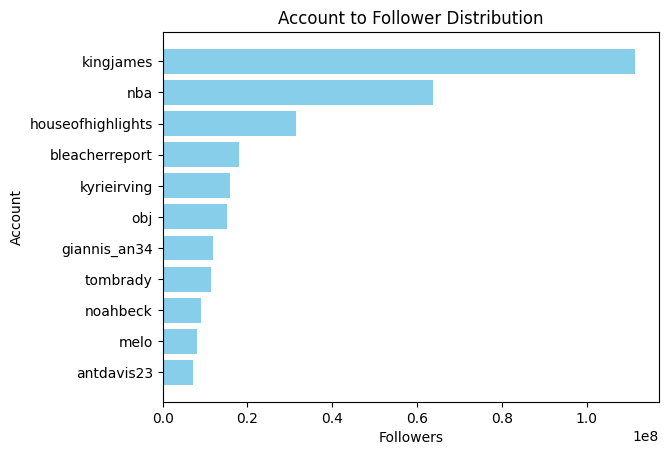

In [23]:
df_us_inf_ball_sorted = df_us_inf_ball.sort_values(by='Followers', ascending=True)

plt.barh(df_us_inf_ball_sorted['Account'], df_us_inf_ball_sorted['Followers'], color='skyblue')

plt.xlabel('Followers')
plt.ylabel('Account')
plt.title('Account to Follower Distribution')

plt.show()

The graph above highlights potential targets for an ad campaign. With big names like LeBron, Irving, and Brady, it may be more effective to focus on broader brands, such as the NBA or Bleacher Report, for more general marketing strategies. Alternatively, expanding the dataset to include the top 10,000 influencers could reveal opportunities to leverage lesser-known accounts across a wider range of audiences. This approach could diversify your advertising strategy, though further data analysis would be necessary to support this direction.

